# Práctica Sistemas Lineales

### Importo Librerias

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math
import copy
import numpy.linalg as linalg

### Importo imagenes

In [8]:
imgLena = imageio.imread('img/lena.png')

In [6]:
def mostrarImagen(img):
    plt.imshow(img, cmap='gray')
    plt.show()

def calcNivelesGrises(img):
    return np.iinfo(img.dtype).max+1

# Ejercicio 1

In [24]:
def plotPointsCenterAxis(x, h):
    ax = plt.figure().add_subplot(111)
    ax.scatter(x,h)
    plt.xlim((-5,5))
    plt.ylim((-5,5))

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.show()

## a)
$$x_{-1} = 0, x_0=1, x_1=0, x_2=0, x_3=0, x_4=0$$
$$h_{-1} = 0, h_0=2, h_1=1, h_2=0, h_3=0, h_4=0$$

<br/>

$$x'_u = (x * h)_u = \sum_{i=-\infty}^\infty x_{u-i} \cdot h_{i}$$

<br/>

$$x'_0 = x_{-1} \cdot h_{-1} + x_{0} \cdot h_0 + ... + x_{4} \cdot h_4 = 2$$

$$x'_1 = x_{0} \cdot h_{-1} + x_{1} \cdot h_0 + ... + x_{4} \cdot h_3 = 0$$

$$x'_2 = x_{1} \cdot h_{-1} + x_{2} \cdot h_0 + ... + x_{4} \cdot h_2 = 0$$

$$x'_3 = x_{2} \cdot h_{-1} + x_{3} \cdot h_0 + x_{4} \cdot h_1 = 0$$

$$x'_4 = x_{3} \cdot h_{-1} + x_{4} \cdot h_0 = 0$$

$$x'_5 = x_{4} \cdot h_{-1} = 0$$

$$x'_{-1} = x_{-2} \cdot h_{-1} + x_{-1} \cdot h_0 + ... + x_{3} \cdot h_4 = 1$$

<br/>
<br/>

$$x'_{-1} = 1, x'_0=2, x'_1=0, x'_2=0, x'_3=0, x'_4=0$$

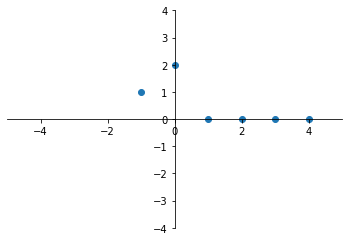

In [21]:
plotPointsCenterAxis([x-1 for x in range(6)], [1,2,0,0,0,0])


## b)
$$x'_0 = x_{-1} \cdot h_{-1} + x_{0} \cdot h_0 + ... + x_{4} \cdot h_4 = 1$$

$$x'_1 = x_{0} \cdot h_{-1} + x_{1} \cdot h_0 + ... + x_{4} \cdot h_3 = 2$$

$$x'_2 = x_{1} \cdot h_{-1} + x_{2} \cdot h_0 + ... + x_{4} \cdot h_2 = 0$$

$$x'_3 = x_{2} \cdot h_{-1} + x_{3} \cdot h_0 + x_{4} \cdot h_1 = 0$$

$$x'_4 = x_{3} \cdot h_{-1} + x_{4} \cdot h_0 = 0$$

$$x'_5 = x_{4} \cdot h_{-1} = 0$$

$$x'_{-1} = x_{-2} \cdot h_{-1} + x_{-1} \cdot h_0 + ... + x_{3} \cdot h_4 = 0$$

<br/>
<br/>

$$x'_{-1} = 0, x'_0=1, x'_1=2, x'_2=0, x'_3=0, x'_4=0$$

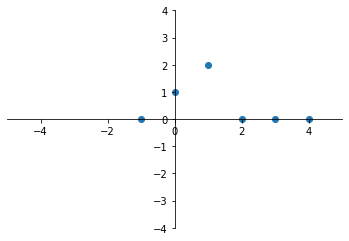

In [22]:
plotPointsCenterAxis([x-1 for x in range(6)], [0,1,2,0,0,0])

## c)
$$x'_0 = x_{-1} \cdot h_{-1} + x_{0} \cdot h_0 + ... + x_{4} \cdot h_4 = -4$$

$$x'_1 = x_{0} \cdot h_{-1} + x_{1} \cdot h_0 + ... + x_{4} \cdot h_3 = 1$$

$$x'_2 = x_{1} \cdot h_{-1} + x_{2} \cdot h_0 + ... + x_{4} \cdot h_2 = 0$$

$$x'_3 = x_{2} \cdot h_{-1} + x_{3} \cdot h_0 + x_{4} \cdot h_1 = 0$$

$$x'_4 = x_{3} \cdot h_{-1} + x_{4} \cdot h_0 = 0$$

$$x'_5 = x_{4} \cdot h_{-1} = 0$$

$$x'_{-1} = x_{-2} \cdot h_{-1} + x_{-1} \cdot h_0 + ... + x_{3} \cdot h_4 = 4$$

$$x'_{-2} = 2$$

<br/>
<br/>

$$x'_{-2}=2, x'_{-1}=4, x'_0=-4, x'_1=1, x'_2=0, x'_3=0, x'_4=0$$

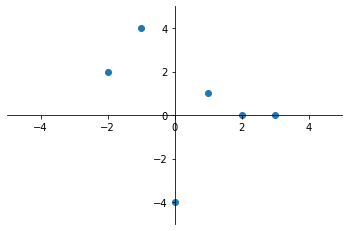

In [25]:
plotPointsCenterAxis([x-2 for x in range(6)], [2,4,-4,1,0,0])

## d)
$$x'_{u,v} = (x * h)_{u,v} = \sum_{i=-\infty}^\infty \sum_{j=-\infty}^\infty x_{u-i,v-j} \cdot h_{i,j}$$

<br/>

$$x'_{0,0} = x_{1,0} \cdot h_{1,0} + x_{1,1} \cdot h_{1,1} = 2$$

$$x'_{1,0} = x_{1,0} \cdot h_{0,0} + x_{1,1} \cdot h_{0,1} + x_{2,0} \cdot h_{1,0} + x_{2,1} \cdot h_{1,1}  = 4$$

$$x'_{2,0} = 4$$

$$x'_{3,0} = 2$$

$$x'_{0,1} = 1$$

$$x'_{0,2} = 0$$

... termino con programa

<br/>
<br/>


In [42]:
def calc(X, H, u, v):
    res = 0
    for x in range(-10,10):
        for y in range(-10,10):
            if u-x in X and v-y in X[u-x] and x in H and y in H[x]:
                res += X[u-x][v-y]*H[x][y]
    return res

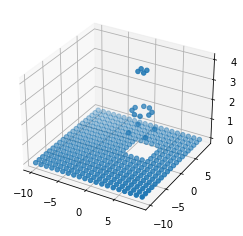

In [68]:
xs,ys,hs=[],[],[]
X = {
    1:{
        0: 1,
        1: 1,
        2: 1
    },
    2:{
        0: 1,
        1: 1,
        2: 1
    },
    3:{
        0: 1,
        1: 1,
        2: 1
    }
}
H = {
    0:{
        0:1,
        1:1
    },
    1:{
        0:1,
        1:1
    }
}
for x in range(-10,10):
    for y in range(-10,10):
        xs.append(x)
        ys.append(y)
        hs.append(calc(X, H, x, y))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs, ys, hs)

# Ejercicio 2

b)
$$z_{u,v} = (x * h)_{u,v} = \sum_{i=-\infty}^\infty \sum_{j=-\infty}^\infty x_{u-i,v-j} \cdot h_{i,j}$$

Sea $x \in \mathbb{Z}^{M_1 \times N_1}$ y $h \in \mathbb{Z}^{M_2 \times N_2}$. Ambas matrices están posicionadas en (0,0), pero la demostración serviría igual que esté posicionada en otro lugar.

- $u < 0$
$$i < 0 \Rightarrow h_{i,j} = 0$$
$$i \geq 0 \Rightarrow x_{u-i,v-j} = 0$$
Entonces
$$\Rightarrow (x * h)_{u,v} = 0$$ 

- $v < 0$
$$j < 0 \Rightarrow h_{i,j} = 0$$
$$j \geq 0 \Rightarrow x_{u-i,v-j} = 0$$
Entonces
$$\Rightarrow (x * h)_{u,v} = 0$$ 

- $u > M_1 + M_2 - 1$
$$i < 0 \Rightarrow h_{i,j} = 0$$
$$0 \leq i \leq M_2 \Rightarrow x_{u-i,v-j} = 0$$
$$i > M_2 \Rightarrow h_{i,j} = 0$$
Entonces
$$\Rightarrow (x * h)_{u,v} = 0$$ 

- $v > N_1 + N_2 - 1$
$$j < 0 \Rightarrow h_{i,j} = 0$$
$$0 \leq j \leq N_2 \Rightarrow x_{u-i,v-j} = 0$$
$$j > N_2 \Rightarrow h_{i,j} = 0$$
Entonces
$$\Rightarrow (x * h)_{u,v} = 0$$ 

- $0 \leq u \leq M_1 + M_2 - 1$ (Asumimos que las entradas son $\neq$ 0)
$$0 \leq u-i \leq M_2 \wedge 0 \leq v-j \leq M_2 \Rightarrow x_{u-i,v-j} \neq 0 \wedge h_{i,j} \neq 0$$
Entonces
$$\Rightarrow (x * h)_{u,v} \neq 0$$ 

- $0 \leq v \leq N_1 + N_2 - 1$
$$0 \leq u-i \leq M_2 \wedge 0 \leq v-j \leq M_2 \Rightarrow x_{u-i,v-j} \neq 0 \wedge h_{i,j} \neq 0$$
Entonces
$$\Rightarrow (x * h)_{u,v} \neq 0$$ 

# Ejercicio 3

# Ejercicio 4

Mismo ejercicio que 6. Ver el 6.

# Ejercicio 5

In [73]:
#Complejidad: (cantidad pixeles x) * (cantidad pixeles h) = n^4 si son cuadradas e iguales, muy alta...
def conv(x, h):
    M1, N1 = np.shape(x)
    M2, N2 = np.shape(h)

    height = M1+M2-1
    width = N1+N2-1
    sol = np.zeros(shape=(height, width))
    for i in range(height):
        for j in range(width):
            sol[i][j] = convPuntual(x, h, i, j)

    return sol     

def convPuntual(x, h, u, v):
    M1, N1 = np.shape(x)
    M2, N2 = np.shape(h)
    sol = 0
    for i in range(M2):
        for j in range(N2):
            if estaEnRango(u-i,M1) and estaEnRango(v-j,N1) and estaEnRango(i,M2) and estaEnRango(j,N2): 
                sol += x[u-i][v-j] * h[i][j]
    return sol

def estaEnRango(x, z): #Rango cerrado abierto
    return x >= 0 and x < z

In [31]:
np.shape(np.array([[1,1,1]]).T)

(3, 1)

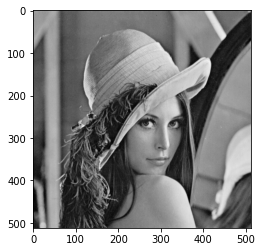

In [43]:
mostrarImagen(imgLena)

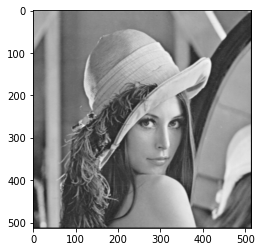

In [44]:
mostrarImagen(conv(imgLena, np.array([[1,1,1]])))

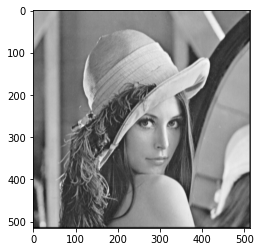

In [38]:
mostrarImagen(conv(imgLena, np.array([[1,1,1]]).T))

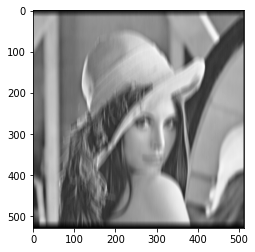

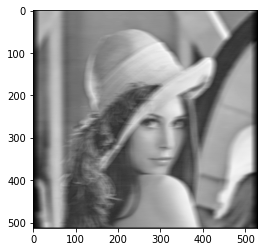

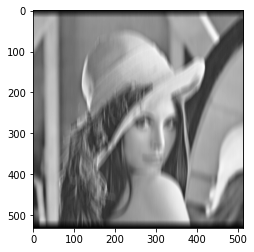

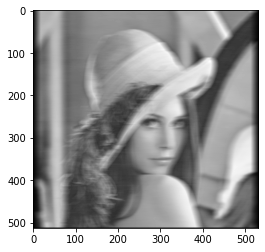

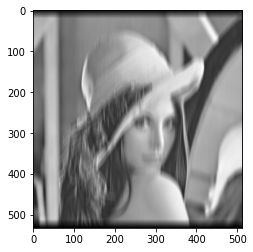

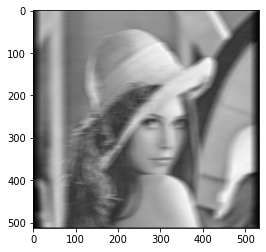

In [53]:
mostrarImagen(conv(imgLena, np.array([[1]*17]).T))
mostrarImagen(conv(imgLena, np.array([[1]*17])))
mostrarImagen(conv(imgLena, np.array([[1]*19]).T))
mostrarImagen(conv(imgLena, np.array([[1]*19])))
mostrarImagen(conv(imgLena, np.array([[1]*21]).T))
mostrarImagen(conv(imgLena, np.array([[1]*21])))

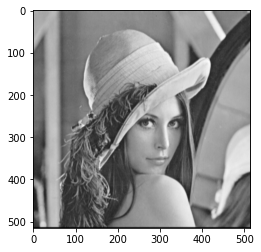

In [54]:
mostrarImagen(conv(imgLena, np.array([[1,1],[1,1],[1,1]])))

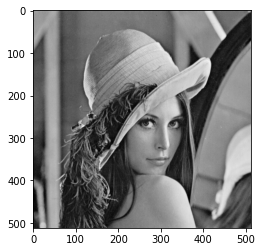

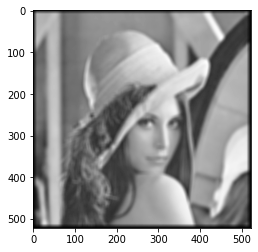

In [57]:
mostrarImagen(imgLena)
mostrarImagen(conv(imgLena, np.ones((10,10))))

## Filtro Gaussiano

In [95]:
def obtenerMatrizFiltroGaussiano(n, sigma=5):
    m = np.zeros((n,n))
    for i in range(len(m)):
        for j in range(len(m)):
            dx = n//2-i
            dy = n//2-j
            m[i][j] = math.e**(-(dx**2+dy**2)/(2*sigma**2))
    return m

[[0.85214379 0.90483742 0.92311635 0.90483742 0.85214379]
 [0.90483742 0.96078944 0.98019867 0.96078944 0.90483742]
 [0.92311635 0.98019867 1.         0.98019867 0.92311635]
 [0.90483742 0.96078944 0.98019867 0.96078944 0.90483742]
 [0.85214379 0.90483742 0.92311635 0.90483742 0.85214379]]


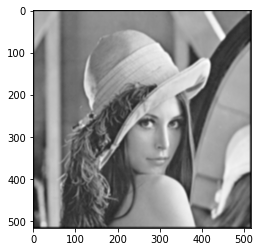

In [98]:
matrizGauss = obtenerMatrizFiltroGaussiano(5)
print(matrizGauss)
mostrarImagen(conv(imgLena, matrizGauss))

## Filtro Sharpening

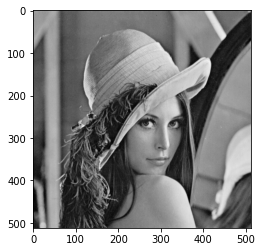

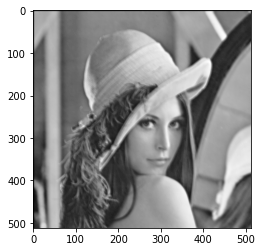

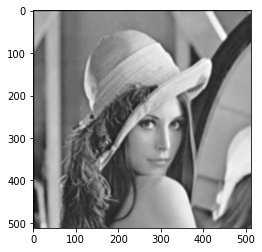

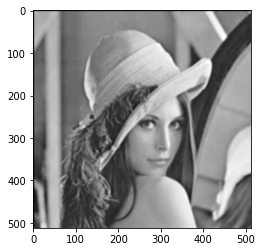

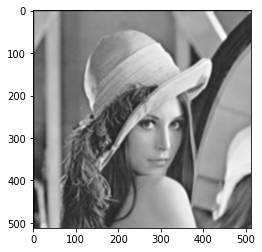

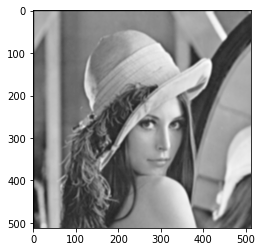

In [125]:
def sharpImage(img, factor=0.5, sigma=5):
    matrizGauss = obtenerMatrizFiltroGaussiano(sigma)
    delta = img - conv(img, matrizGauss)[0:-4, 0:-4]
    for i in range(len(delta)):
        for j in range(len(delta[0])):
            delta[i][j] = abs(delta[i][j])
    return img + np.dot(factor, delta)

mostrarImagen(imgLena)
mostrarImagen(sharpImage(imgLena, 0.1))
mostrarImagen(sharpImage(imgLena, 0.3))
mostrarImagen(sharpImage(imgLena, 0.5))
mostrarImagen(sharpImage(imgLena, 0.7))
mostrarImagen(sharpImage(imgLena, 0.9))

## Mediana, Mínimo y Máximo

In [134]:
def filtroMediana(img,n):
    imgCopy = copy.deepcopy(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            v = []
            for z in range(n):
                for k in range(n):
                    if i-n//2+z > 0 and i-n//2+z < len(img) and j-n//2+k > 0 and j-n//2+k < len(img[0]):
                        v.append(img[i-n//2+z][j-n//2+k])
            imgCopy[i][j] = np.median(v)
    return imgCopy

def filtroMax(img,n):
    imgCopy = copy.deepcopy(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            v = []
            for z in range(n):
                for k in range(n):
                    if i-n//2+z > 0 and i-n//2+z < len(img) and j-n//2+k > 0 and j-n//2+k < len(img[0]):
                        v.append(img[i-n//2+z][j-n//2+k])
            imgCopy[i][j] = np.max(v)
    return imgCopy

def filtroMin(img,n):
    imgCopy = copy.deepcopy(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            v = []
            for z in range(n):
                for k in range(n):
                    if i-n//2+z > 0 and i-n//2+z < len(img) and j-n//2+k > 0 and j-n//2+k < len(img[0]):
                        v.append(img[i-n//2+z][j-n//2+k])
            imgCopy[i][j] = np.min(v)
    return imgCopy


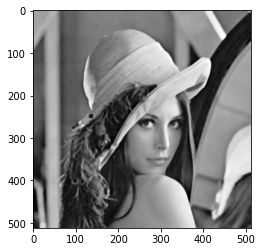

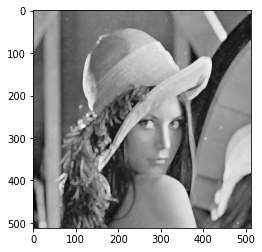

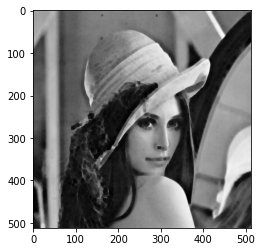

In [135]:
mostrarImagen(filtroMediana(imgLena, 5))
mostrarImagen(filtroMax(imgLena, 5))
mostrarImagen(filtroMin(imgLena, 5))

# Ejercicio 6

Sea $x \in \mathbb{Z}^{M_1 \times N_1}$ y $h \in \mathbb{Z}^{M_2 \times N_2}$.
 
Qvq $\forall u,v \in \mathbb{Z}$:
$$\sum_{i=-\infty}^\infty \sum_{j=-\infty}^\infty x_{u-i,v-j} \cdot h_{i,j} = \sum_{i=-\infty}^\infty \sum_{j=-\infty}^\infty h_{u-i,v-j} \cdot x_{i,j}$$

$z = u-i$ y $y = v-j$
$$\Rightarrow \sum_{i=-\infty}^\infty \sum_{j=-\infty}^\infty x_{u-i,v-j} \cdot h_{i,j} = \sum_{u-z=-\infty}^\infty \sum_{v-y=-\infty}^\infty x_{z,y} \cdot h_{u-z,v-y}$$

$$= \sum_{u-z=-\infty}^\infty \sum_{v-y=-\infty}^\infty h_{u-z,v-y} \cdot x_{z,y}$$

$$= \sum_{z=-\infty}^\infty \sum_{y=-\infty}^\infty h_{u-z,v-y} \cdot x_{z,y}$$

In [81]:
import random
from IPython.display import clear_output

## Conmutativa

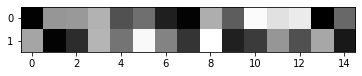

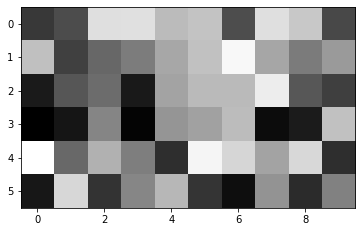

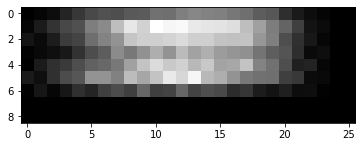

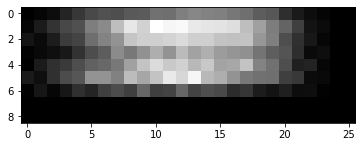

AssertionError: 

In [71]:
for i in range(100):
    A = np.random.randint(0,100,(random.randint(1, 30),random.randint(1, 30)))
    B = np.random.randint(0,100,(random.randint(1, 30),random.randint(1, 30)))
    assert((conv(A,B) == conv(B,A)).all())

## Distributiva

In [83]:
for i in range(100):
    clear_output(wait=True)
    print(i)

    n = random.randint(1, 20)
    A = np.random.randint(0,100,(n,n))
    B = np.random.randint(0,100,(n,n))
    C = np.random.randint(0,100,(n,n))
    assert((conv(A,B+C) == conv(A,B)+conv(A,C)).all())
    

99


## Asociativa

In [84]:
for i in range(100):
    clear_output(wait=True)
    print(i)

    A = np.random.randint(0,100,(random.randint(1, 20),random.randint(1, 20)))
    B = np.random.randint(0,100,(random.randint(1, 20),random.randint(1, 20)))
    C = np.random.randint(0,100,(random.randint(1, 20),random.randint(1, 20)))
    assert((conv(conv(A,B),C) == conv(conv(A,B),C)).all())

99
